In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Joint plot

In [2]:
save_dir_win = "E:/cmu/lab project/result & analysis/V5-pilot/plot"
save_dir_mac = "/Volumes/T7/CMU LiMN Research/perceptual organization/result & analysis/V5-prolific/Result"

df_PA = pd.read_csv(os.path.join(save_dir_mac,'P_A_dprime_result.csv'))
df_SD = pd.read_csv(os.path.join(save_dir_mac,'S_D_dprime_result.csv'))

df_PA['Experiment'] = 'P_A'
df_SD['Experiment'] = 'S_D'

df = pd.concat([df_PA, df_SD])
print('total subjects', len(df)/2)
print(df.columns)
print(df.empty)

total subjects 19.0
Index(['Randomized Pitch', 'Randomized Syllable', 'Experiment'], dtype='object')
False


In [3]:
df_PA = df[df['Experiment'] == 'P_A']
df_SD = df[df['Experiment'] == 'S_D']

# fixed_list = [[row_PA['Fixed Pitch'], row_PA['Fixed Syllable'], row_SD['Fixed Pitch'], row_SD['Fixed Syllable']] 
#               for (_, row_PA), (_, row_SD) in zip(df_PA.iterrows(), df_SD.iterrows())]
# print(len(fixed_list))
# print(len(fixed_list[0]))

randomized_list = [[row_PA['Randomized Pitch'], row_PA['Randomized Syllable'], row_SD['Randomized Pitch'], row_SD['Randomized Syllable']] 
                   for (_, row_PA), (_, row_SD) in zip(df_PA.iterrows(), df_SD.iterrows())]

print('total subjects', len(randomized_list))
print('total number of category for plotting', len(randomized_list[0]))

total subjects 19
total number of category for plotting 4


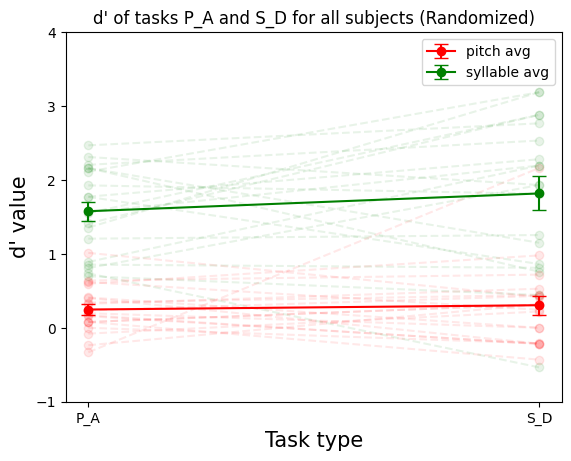

In [4]:
# Convert randomized_list to numpy array for easier calculations
dprime_array_random = np.array(randomized_list)

# Calculate average and standard error
dprime_avg_random = np.mean(dprime_array_random, axis=0)
dprime_sem_random = np.std(dprime_array_random, axis=0) / np.sqrt(len(randomized_list))

# Plotting
x = ['P_A', 'S_D']

# Plot data for all subjects
for i, dprime in enumerate(randomized_list):
    pitch = [dprime[0], dprime[2]]
    syllable = [dprime[1], dprime[3]]
    plt.plot(x, pitch, 'r--o', alpha=0.09)
    plt.plot(x , syllable, 'g--o', alpha=0.09)

# Plot average d' with error bars
plt.errorbar(x, dprime_avg_random[0::2], yerr=dprime_sem_random[0::2], fmt='ro-', label='pitch avg', capsize=5)
plt.errorbar(x, dprime_avg_random[1::2], yerr=dprime_sem_random[1::2], fmt='go-', label='syllable avg', capsize=5)

plt.title('d\' of tasks P_A and S_D for all subjects (Randomized)')
plt.xlabel('Task type', fontsize=15)
plt.ylabel('d\' value', fontsize=15)
plt.xticks(x)
plt.ylim([-1, 4])
plt.legend()
#plt.show()


# specify the full path (including filename) where you want to save the plot
save_path = os.path.join(save_dir_mac, "V5_prolific_result.png")
# save the plot
plt.savefig(save_path, dpi=300)
plt.show()

### Statistical test

In [9]:
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

In [11]:
df1 = pd.read_csv(os.path.join(save_dir_mac,'PA_dprime.csv'))
df2 = pd.read_csv(os.path.join(save_dir_mac,'SD_dprime.csv'))
df3 = pd.concat([df1, df2])
#print(df3)

# assuming df is your DataFrame
random_df = df3[df3['structure'].str.contains('random')]
print(len(random_df)/4)

19.0


In [12]:
## 2 * 2 within subject ANOVA

# # Run the repeated measures ANOVA
# aov = pg.rm_anova(dv='dprime', within=['task', 'attend_condition'], subject='subject', data=df3)

# # Print the ANOVA table
# print(aov)

# # Run the repeated measures ANOVA
# aov1 = pg.rm_anova(dv='dprime', within=['task', 'attend_condition'], subject='subject', data=fixed_df)

# # Print the ANOVA table
# print(aov1)

# Run the repeated measures ANOVA
aov2 = pg.rm_anova(dv='dprime', within=['task', 'attend_condition'], subject='subject', data=random_df)

# Print the ANOVA table
print(aov2)

###Use Gpower from here

                    Source         SS  ddof1  ddof2         MS          F  \
0                     task   0.423745      1     18   0.423745   0.951956   
1         attend_condition  38.361991      1     18  38.361991  88.487817   
2  task * attend_condition   0.157151      1     18   0.157151   0.604247   

          p-unc     p-GG-corr       ng2  eps  
0  3.421531e-01  3.421531e-01  0.012584  1.0  
1  2.269423e-08  2.269423e-08  0.535686  1.0  
2  4.470587e-01  4.470587e-01  0.004704  1.0  
